## Sztuczna inteligencja i inżynieria wiedzy 
### Lista 3 - Planowanie z wykorzystaniem języka PDDL
##### Aleksander Stepaniuk 272644

**Spis treści**  
1. Wprowadzenie  
2. Analiza zadań  
3. Wnioski  

## 1. Wprowadzenie

W raporcie dokonano analizy trzech problemów planowania:
- **Zadanie 1**: transport paczek z różnymi środkami transportu i optymalizacją kosztu.
- **Zadanie 2**: sprzątający robot odwiedzający i odkurzający pokoje.
- **Zadanie 3**: robot z dwoma ramionami przenoszący piłki.

Skupiono się na:
- strukturze modelu PDDL,
- wynikach planów (koszt, liczba kroków, czas),
- wnioskach z każdego przypadku.


## 2. Analiza zadań

### Zadanie 1: Transport paczek
W definicji domeny użyto poniższych rozszerzeń języka PDDL: `strips`, `typing`, `durative-action`, `negative-preconditions`, `fluents`.

Opis predykatów:
- `at-trk`: pojazd w danej lokalizacji
- `at-pkg`: paczka w danej lokalizacji
- `in-truck`: paczka w ciężarówce
- `connected`: połączenie między lokalizacjami
- `isbusy`: pojazd jest zajęty, albo podróżą albo załadunkiem/rozładunkiem

Opis funkcji:
- `travel-time`: czas podróży między lokalizacjami

Opis akcji:
- `load`: załadunek paczki do pojazdu
- `unload`: rozładunek paczki z pojazdu
- `drive`: podróż pojazdu między lokalizacjami (koszt zmienny i zależny od funkcji `travel-time`)


Próbę znalezienia rozwiązania wykonano za pomocą dwóch planerów: `TFD` (Temporal Fast Downward) i `LPG-TD` (Local Search for Planning Graphs with Temporal Dependencies). Inne planery skutkowały nieznanymi błędami. Planer `TFD` wygenerował plan o koszcie 20.13, natomiast `LPG-TD` również znajdował plan, ale o znacznie większym koszcie.

Wizualizacja planu:

`TFD`:

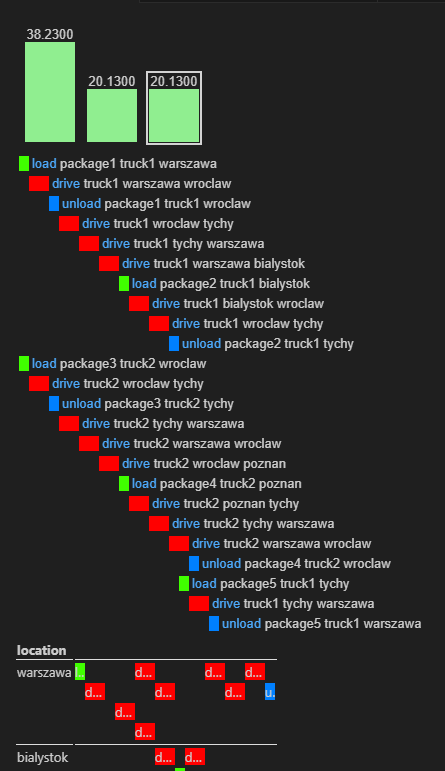
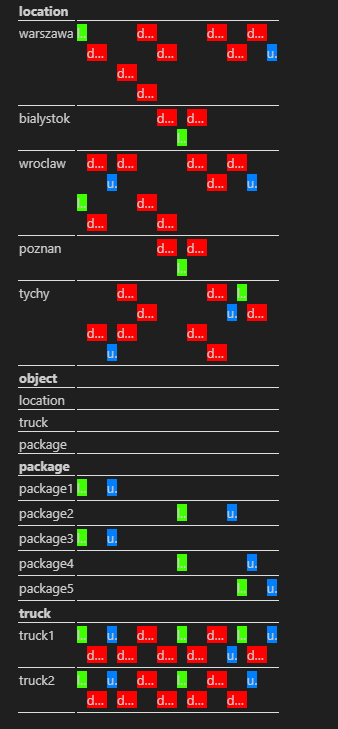

`LPG-TD`:

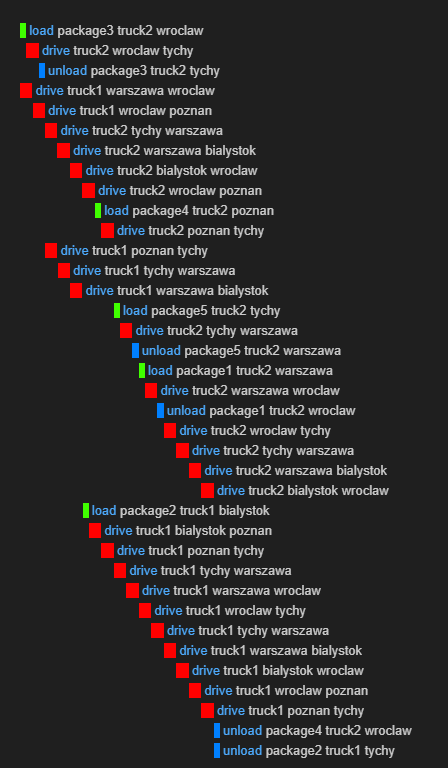
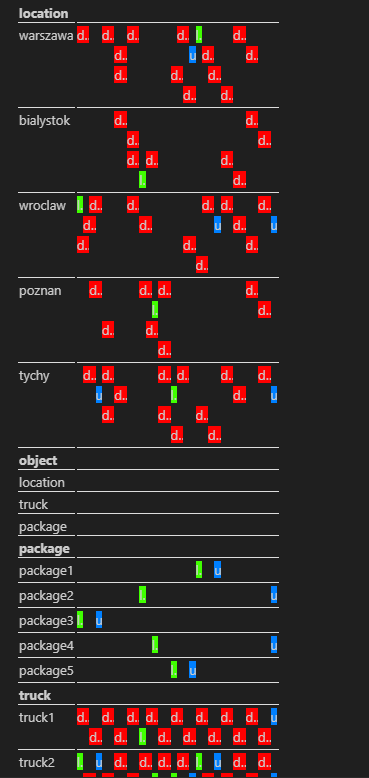

### Zadanie 2: Sprzątający robot
- Celem jest odkurzyć pokoje room1, room2, room3.
- Proste akcje STRIPS: `move` i `clean`, oraz predykaty `at`, `dirty`, `clean`.
- **Wyniki**:
  - koszt: 6 kroków
- **Uwagi**:  
  - model jest prosty i znajduje plan optymalny bardzo szybko.  
  - brak różnic w metrykach czasowych czy kosztowych – każdy planer znajduje plan o tej samej długości.
  - znalezione rozwiązanie jest optymalne, ponieważ nie jest możliwe osiągnięcie warunków końcowych w mniejszej liczbie kroków.

Wizualizacja planu:

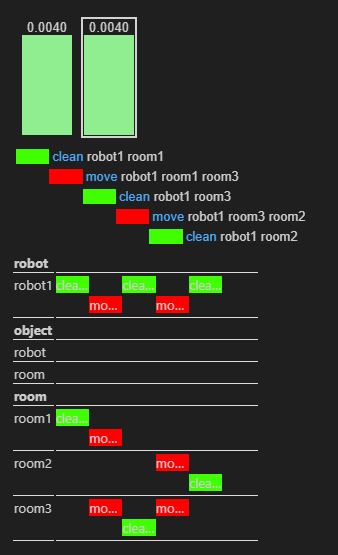
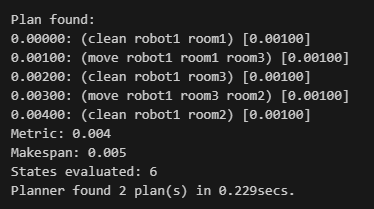


### Zadanie 3: Przenoszenie piłek
- celem jest przenieść 4 piłki z room1 do room2, wykorzystując dwa ramiona.
- model to STRIPS z predykatami `holding`, `arm-empty`, `inroom`, `at`.
- **Wyniki**:
  - liczba kroków: 11 (4 × [`pick-up` + `put-down`] + 3 [`move`]).
- **Uwagi**:  
  - brak kosztów i czasów – idealne do demonstracji koncepcji wielu „agentów” (ramion).
  - znalezione rozwiązanie jest optymalne, ponieważ nie jest możliwe osiągnięcie warunków końcowych w mniejszej liczbie kroków.

Wizualizacja planu:

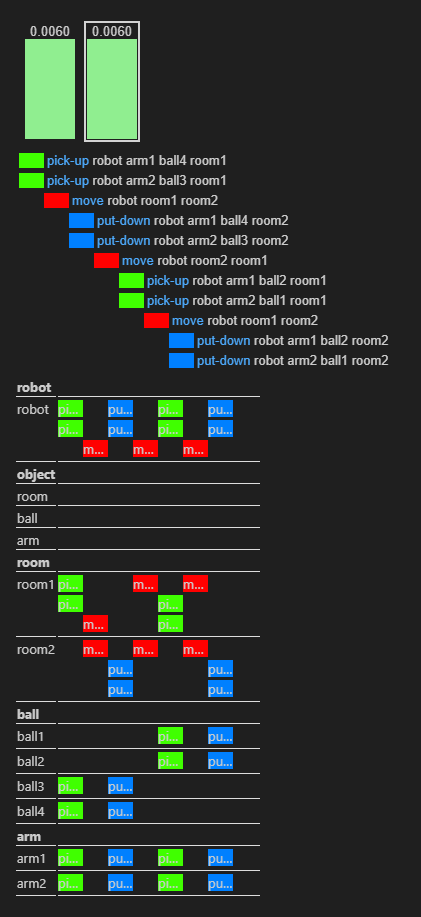
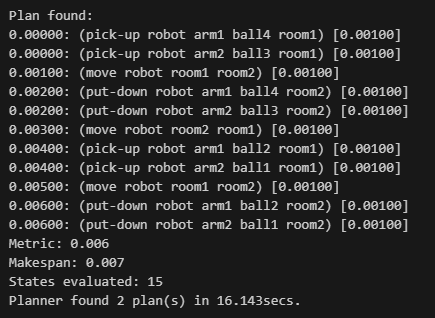

## 3. Wnioski
  
Podczas rozwiązywania tych trzech zadań napotkałem kilka problemów. 
  
Pierwszy wystąpił jeśli chodzi o interpretację polecenia zadania pierwszego, ponieważ w instrukcji nie jest wprost napisane jaki jest cel tego zadania. 
  
Drugi problem wystąpił na etapie tworzenia środowiska interpretera tego planera - a musiałem działać w środowisku lokalnym, ponieważ dostępny w przeglądarce planer editor.planning.domains nie obsługiwał rozszerzenia durative-actions. Musiałem więc użyć narzędzia planutils, które pozwala dobrać odpowiedni interpreter do planowania z długiej listy możliwych interpreterów, jednak większość z nich nie pozwalała na uruchomienie procesu planowania, często rzucając do konsoli pusty błąd języka python lub informację o błędzie syntaxowym w miejscu, w którym takiego błędu na pewno nie było

Sama instalacja tego środowiska również nie należała do najprostszych, ponieważ nie była w żaden sposób opisana w liście zadań, a sam proces instalacji wymagał wielu kroków, które nie należały do oczywistych i wymagały postawienia środowiska WSL, serwera Flask i wielu innych rzeczy, które zajmują dużą ilość czasu.
